In [4]:
import re
import string
import nltk
import spacy
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords
from nltk.util import ngrams


In [5]:
import nltk
# Download the 'punkt_tab' data package
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [6]:
# Load Spacy model
nlp = spacy.load("en_core_web_sm")
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

/usr/local/lib/python3.11/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [7]:
# Sample paragraph related to Cybersecurity
text = "Cybersecurity is crucial in today's digital age! It helps protect digital data from breaches and cyber threats . Don't ignore the importance of encryption. For inquiries, contact security.expert@domain.com or call 9876543210. My birthdate is 15-April-1995.Cyber Security has alot of opportunities in upcoming time."


In [8]:
# a. Count unique tokens
tokens = nltk.word_tokenize(text)
unique_tokens = set(tokens)
print(f"Number of unique tokens: {len(unique_tokens)}")

Number of unique tokens: 45


In [9]:
# b. Count and remove punctuation
punct_count = sum(1 for char in text if char in string.punctuation)
text_no_punct = text.translate(str.maketrans('', '', string.punctuation))
print(f"Number of punctuation characters: {punct_count}")


Number of punctuation characters: 14


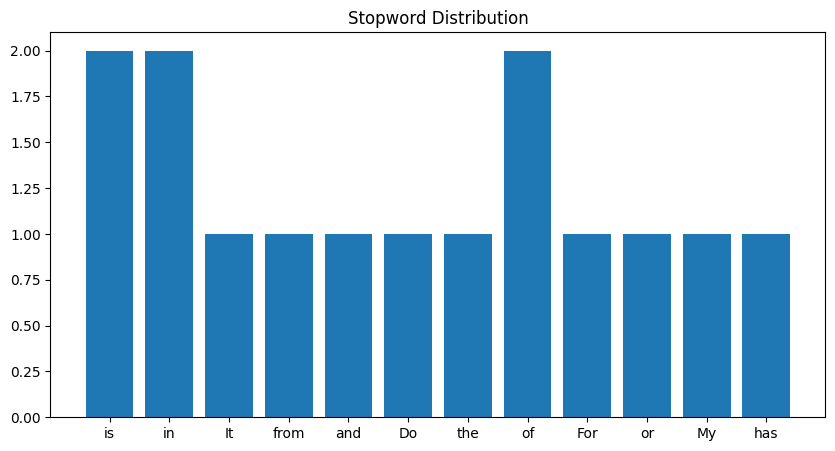

In [10]:
# c. Plot distribution of stopwords
stop_words = set(stopwords.words('english'))
stopword_counts = Counter(word for word in tokens if word.lower() in stop_words)
plt.figure(figsize=(10, 5))
plt.bar(stopword_counts.keys(), stopword_counts.values())
plt.title("Stopword Distribution")
plt.show()

In [ ]:
# d. Remove stopwords
filtered_text = [word for word in tokens if word.lower() not in stop_words]
print("Text without stopwords:", ' '.join(filtered_text))

Text without stopwords: Cybersecurity crucial today 's digital age ! helps protect digital data breaches cyber threats . n't ignore importance encryption . inquiries , contact security.expert @ domain.com call 9876543210 . birthdate 15-April-1995.Cyber Security alot opportunities upcoming time .


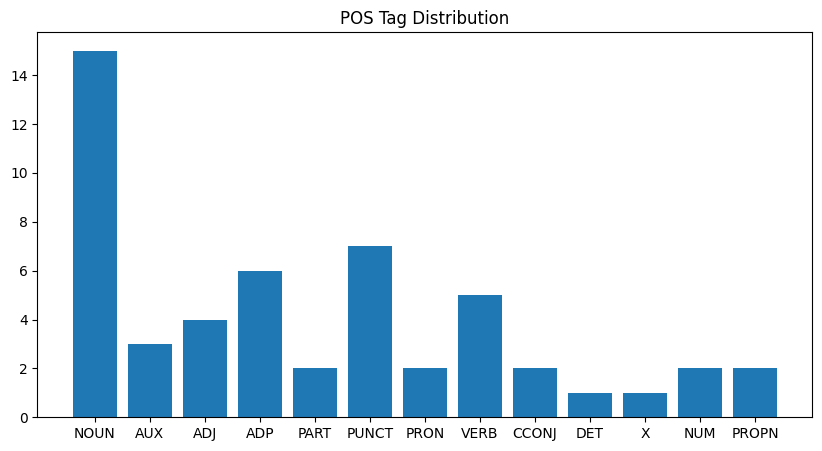

In [11]:
# e. Plot POS tag distribution
doc = nlp(text)
pos_counts = Counter(token.pos_ for token in doc)
plt.figure(figsize=(10, 5))
plt.bar(pos_counts.keys(), pos_counts.values())
plt.title("POS Tag Distribution")
plt.show()

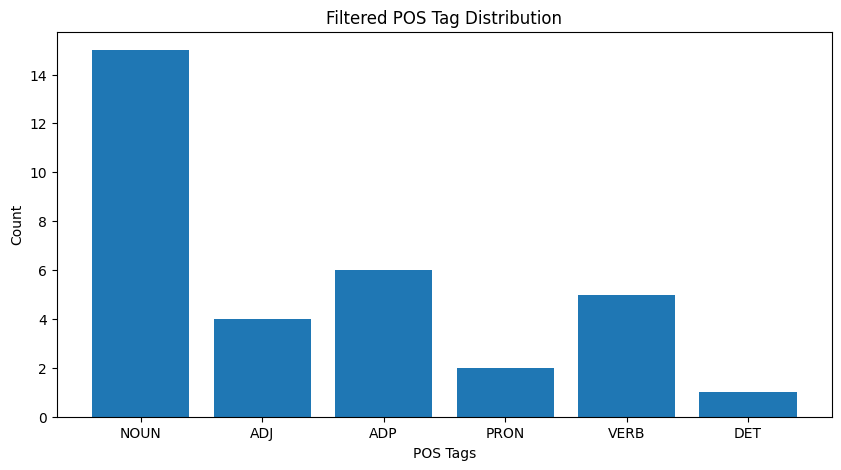

In [12]:
import spacy
import matplotlib.pyplot as plt
from collections import Counter

nlp = spacy.load("en_core_web_sm")
doc = nlp(text)
selected_pos = {"NOUN", "VERB", "ADJ", "ADV", "PRON", "DET", "ADP"}  # Modify as needed

# Count only selected POS tags
pos_counts = Counter(token.pos_ for token in doc if token.pos_ in selected_pos)

# Plot the POS distribution
plt.figure(figsize=(10, 5))
plt.bar(pos_counts.keys(), pos_counts.values())
plt.title("Filtered POS Tag Distribution")
plt.xlabel("POS Tags")
plt.ylabel("Count")
plt.show()

In [ ]:
# f. Count unique lemmas
lemmas = set(token.lemma_ for token in doc)
print(f"Number of unique lemmas: {len(lemmas)}")

Number of unique lemmas: 45


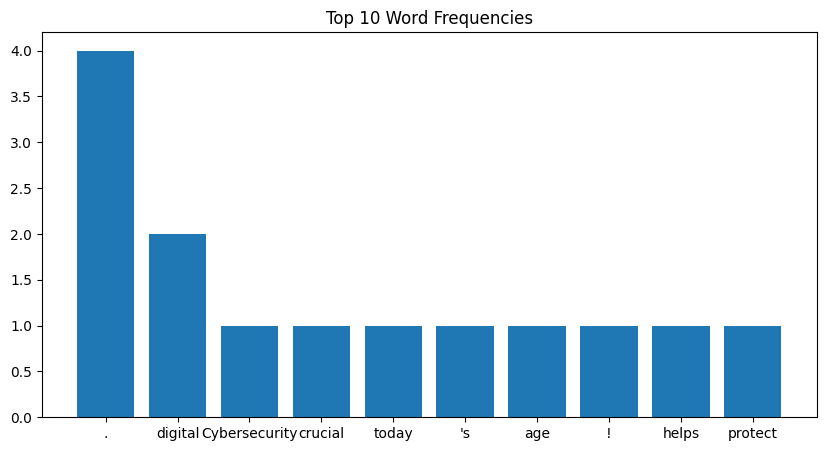

In [ ]:
# g. Plot word frequency (Top 10 words)
word_freq = Counter(filtered_text)
common_words = word_freq.most_common(10)
plt.figure(figsize=(10, 5))
plt.bar([word[0] for word in common_words], [word[1] for word in common_words])
plt.title("Top 10 Word Frequencies")
plt.show()

In [ ]:
# h. Count unique bigrams, trigrams, quadgrams
bigrams = set(ngrams(filtered_text, 2))
trigrams = set(ngrams(filtered_text, 3))
quadgrams = set(ngrams(filtered_text, 4))
print(f"Unique bigrams: {len(bigrams)}, trigrams: {len(trigrams)}, quadgrams: {len(quadgrams)}")


Unique bigrams: 36, trigrams: 35, quadgrams: 34


In [ ]:
# i. Convert dates to DD-MM-YYYY format
date_pattern = r"\b(\d{1,2})[-](\w+)[-](\d{4})\b"

def convert_date(match):
    months = {
        "January": "01", "February": "02", "March": "03", "April": "04", "May": "05", "June": "06",
        "July": "07", "August": "08", "September": "09", "October": "10", "November": "11", "December": "12"
    }
    day, month, year = match.groups()
    return f"{day}-{months.get(month, '00')}-{year}"  # Default '00' if month not found

# Apply date conversion
text = re.sub(date_pattern, convert_date, text)
print("Text with formatted date:", text)


Text with formatted date: Cybersecurity is crucial in today's digital age! It helps protect digital data from breaches and cyber threats . Don't ignore the importance of encryption. For inquiries, contact security.expert@domain.com or call 9876543210. My birthdate is 15-00-1995.Cyber Security has alot of opportunities in upcoming time.


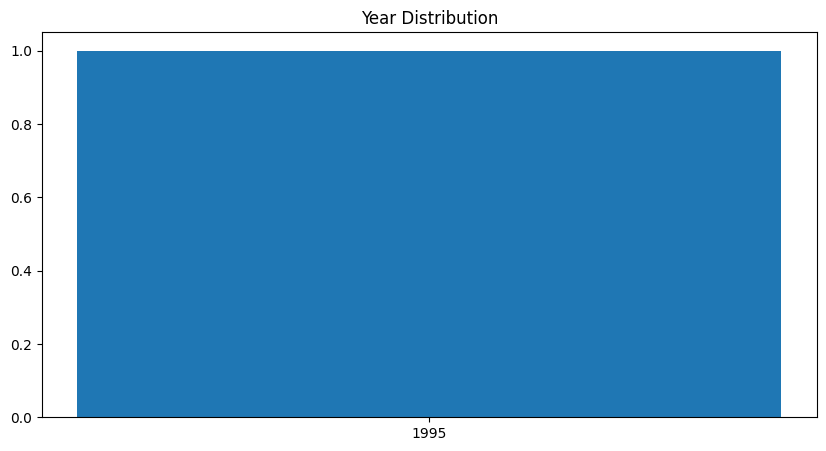

In [ ]:
# j. Plot distribution of years
year_pattern = r"\b(\d{4})\b"
years = re.findall(year_pattern, text)
year_counts = Counter(years)
plt.figure(figsize=(10, 5))
plt.bar(year_counts.keys(), year_counts.values())
plt.title("Year Distribution")
plt.show()


In [ ]:

# k. Validate phone numbers (India format: 10 digits)
phone_pattern = r"\b\d{10}\b"
valid_phone_numbers = re.findall(phone_pattern, text)
print("Valid phone numbers found:", valid_phone_numbers)

# Remove invalid phone numbers
text = re.sub(r"\b\d{9}\b", "", text)
print("Cleaned text:", text)

Valid phone numbers found: ['9876543210']
Cleaned text: Cybersecurity is crucial in today's digital age! It helps protect digital data from breaches and cyber threats . Don't ignore the importance of encryption. For inquiries, contact security.expert@domain.com or call 9876543210. My birthdate is 15-00-1995.Cyber Security has alot of opportunities in upcoming time.
